## Erschließungsstrategien für unbekannten Wortschatz von DaF-Lernenden an spanischen Universitäten - Pilotstudie 2017
# Datenbereinigung der Lernendenbefragung


#### Werkzeuge und Daten importieren

In [1]:
import pandas as pd
import numpy as np
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
Rohdaten = pd.read_csv('D:\Daten\DISS\Daten\EstrategiasEstudiantesKienbergerP2017n.tsv', sep = '\t', encoding='utf-16')

In [3]:
#Rohdaten = pd.read_excel('D:\Daten\DISS\Daten\EstrategiasEstudiantesKienbergerP2017n.xlsx')

In [4]:
Rohdaten.head(4)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,D-Q8b21b,D-Q8b21c,D-Q8b22a,D-Q8b22a_7_TEXT,D-Q8b22b,D-Q8b22c,D-Q9,E-Q1,Q3_3_TEXT - Topics,A-Q1 - Topics
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,¿Durante cuántos años ha estudiado latín?,Comentarios (opcional):,¿Cómo ha aprendido fundamentalmente el o los d...,¿Cómo ha aprendido fundamentalmente el o los d...,¿Qué nivel ha alcanzado?,Comentarios (opcional):,¿Dónde ha rellenado esta encuesta?,"Si lo desea, puede escribir un comentario y da...",Q3_3_TEXT - Topics,A-Q1 - Topics
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID152_TEXT""}","{""ImportId"":""QID153_TEXT""}","{""ImportId"":""QID89""}","{""ImportId"":""QID89_7_TEXT""}","{""ImportId"":""QID168""}","{""ImportId"":""QID169_TEXT""}","{""ImportId"":""QID96""}","{""ImportId"":""QID94_TEXT""}","{""ImportId"":""QID12_3_TEXT_f4a4b2131fea4fa19fd2...","{""ImportId"":""QID5_TEXT_f4a4b2131fea4fa19fd2d06..."
2,09.11.2017 13:10,09.11.2017 13:25,0,88.3.172.215,100,909,1,09.11.2017 13:25,R_1kOiXpqqaX3Irxm,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,Gratificante y útil,NaN,Unknown
3,10.11.2017 01:39,10.11.2017 01:54,0,212.128.135.110,100,897,1,10.11.2017 01:54,R_1F5FzvY7aYwiipy,NaN,...,4,NaN,NaN,NaN,NaN,NaN,2,Una encuesta muy completa que me ha servido pa...,NaN,Unknown


In [5]:
Rohdaten = Rohdaten.drop(1)
Rohdaten.head(3)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,D-Q8b21b,D-Q8b21c,D-Q8b22a,D-Q8b22a_7_TEXT,D-Q8b22b,D-Q8b22c,D-Q9,E-Q1,Q3_3_TEXT - Topics,A-Q1 - Topics
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,¿Durante cuántos años ha estudiado latín?,Comentarios (opcional):,¿Cómo ha aprendido fundamentalmente el o los d...,¿Cómo ha aprendido fundamentalmente el o los d...,¿Qué nivel ha alcanzado?,Comentarios (opcional):,¿Dónde ha rellenado esta encuesta?,"Si lo desea, puede escribir un comentario y da...",Q3_3_TEXT - Topics,A-Q1 - Topics
2,09.11.2017 13:10,09.11.2017 13:25,0,88.3.172.215,100,909,1,09.11.2017 13:25,R_1kOiXpqqaX3Irxm,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,Gratificante y útil,NaN,Unknown
3,10.11.2017 01:39,10.11.2017 01:54,0,212.128.135.110,100,897,1,10.11.2017 01:54,R_1F5FzvY7aYwiipy,NaN,...,4,NaN,NaN,NaN,NaN,NaN,2,Una encuesta muy completa que me ha servido pa...,NaN,Unknown


#### Glossar erstellen

In [6]:
gloss = pd.DataFrame(Rohdaten.loc[0])

In [7]:
def get_name_gloss(word):
    for i, val in enumerate(gloss[0]):
        if word.lower() in str(val).lower():
            return i, gloss.index[i]

In [8]:
Rohdaten = Rohdaten.drop(0).reset_index(drop=True)
Rohdaten.head(3)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,D-Q8b21b,D-Q8b21c,D-Q8b22a,D-Q8b22a_7_TEXT,D-Q8b22b,D-Q8b22c,D-Q9,E-Q1,Q3_3_TEXT - Topics,A-Q1 - Topics
0,09.11.2017 13:10,09.11.2017 13:25,0,88.3.172.215,100,909,1,09.11.2017 13:25,R_1kOiXpqqaX3Irxm,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,Gratificante y útil,NaN,Unknown
1,10.11.2017 01:39,10.11.2017 01:54,0,212.128.135.110,100,897,1,10.11.2017 01:54,R_1F5FzvY7aYwiipy,NaN,...,4,NaN,NaN,NaN,NaN,NaN,2,Una encuesta muy completa que me ha servido pa...,NaN,Unknown
2,10.11.2017 02:23,10.11.2017 02:39,0,212.128.135.84,100,935,1,10.11.2017 02:39,R_2ErWjTyNYcSh10N,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,Unknown


### Gültige Daten auswählen

##### Tests entfernen:

In [9]:
Rohdaten[Rohdaten['DistributionChannel'] == 'preview'].shape

(0, 219)

In [10]:
ind_test = []
for j, wert in enumerate(Rohdaten['A-Q1']):
    if 'test' in str(wert):
        ind_test.append(j)
    if 'Test' in str(wert):
        ind_test.append(j)

In [11]:
ind_test

[47, 107, 108, 125]

In [12]:
Rohdaten['A-Q1'].loc[47]

'Normalmente intento sacar el contesto primero. Siempre y cuando conozca el verbo y los sustantivos no suelo tener problema. Cuando no conozco el verbo intento seguir el texto para ver si hay alguna conexión entre ambas frases y sobretodo para intentar no agobiarme por no entender una palabra.'

In [13]:
ind_test.pop(0)

47

In [14]:
ind_test

[107, 108, 125]

In [15]:
Daten = Rohdaten.drop(ind_test).reset_index(drop=True)

##### Fertig ausgefüllte Fragebögen:

In [16]:
Finished = Daten[Daten['Finished'] == '1'].reset_index(drop=True)
Finished.head(3)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,D-Q8b21b,D-Q8b21c,D-Q8b22a,D-Q8b22a_7_TEXT,D-Q8b22b,D-Q8b22c,D-Q9,E-Q1,Q3_3_TEXT - Topics,A-Q1 - Topics
0,09.11.2017 13:10,09.11.2017 13:25,0,88.3.172.215,100,909,1,09.11.2017 13:25,R_1kOiXpqqaX3Irxm,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,Gratificante y útil,NaN,Unknown
1,10.11.2017 01:39,10.11.2017 01:54,0,212.128.135.110,100,897,1,10.11.2017 01:54,R_1F5FzvY7aYwiipy,NaN,...,4,NaN,NaN,NaN,NaN,NaN,2,Una encuesta muy completa que me ha servido pa...,NaN,Unknown
2,10.11.2017 02:23,10.11.2017 02:39,0,212.128.135.84,100,935,1,10.11.2017 02:39,R_2ErWjTyNYcSh10N,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,Unknown


##### Fragebögen mit fehlenden Werten ermitteln:

In [17]:
def count_nan(row):
    cnt = 0
    for el in row:
        if (str(el) == 'nan'):
            cnt = cnt + 1
    return cnt*100/len(row)

In [18]:
porc_nan = []
for i in range(Finished.shape[0]):
    porc_nan.append(count_nan(Finished.loc[i]))

In [19]:
Finished['porc_nan'] = porc_nan

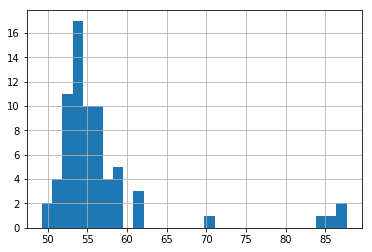

In [20]:
Finished['porc_nan'].hist(bins=30)

In [21]:
Finished[Finished['porc_nan'] > 65].index

Int64Index([55, 56, 58, 59, 61], dtype='int64')

In [22]:
#Finished.loc[61]

In [23]:
Finished = Finished.drop(Finished[Finished['porc_nan'] > 65].index).reset_index(drop=True)

##### Duplikate entfernen:

In [24]:
ind_dup = []
for j, wert in enumerate(Finished['A-Q1']):
    if 'rellenad' in str(wert):
        ind_dup.append(j)

In [25]:
ind_dup

[]

Durch die Entfernung der Fragebögen mit fehlenden Werten wurden auch die Duplikate ermittelt und eliminiert.

In [26]:
#Datenber = Finished.drop(ind_dup).reset_index(drop=True)

##### Teilweise ausgefüllte Fragebögen:

Für bestimmte Teile der Analyse können auch Daten von TN verwendet werden, die die Befragung nicht bis zum Ende durchgeführt haben. Zu diesem Zweck werden die Daten der TN zusammengestellt, die Teil A1 bis A2 vollständig beantwortet haben. (Es gibt keine TN, die auch Teil A3 vollständig ausgefüllt haben.)

In [27]:
Daten[(Daten['Finished'] == '0') & (Daten['A-Q3_27'] >= '1')].shape

(0, 219)

In [28]:
Finished_A2 = Daten[(Daten['Finished'] == '0') & (Daten['A-Q2_7'] >= '1')]

In [29]:
Finished_A2 = Finished_A2[Finished_A2['A-Q1'].notnull()]

In [30]:
Finished_A2.shape

(2, 219)

In [31]:
Finished_A2 = Finished_A2.reset_index(drop=True)

In [32]:
Finished_All = Finished.append(Finished_A2, sort=False)

In [33]:
Finished_All = Finished_All.reset_index(drop=True)

In [34]:
Finished_All.shape

(68, 220)

In [35]:
Datenber = Finished_All

### Art der Werte kontrollieren und anpassen

In [36]:
# Datenber.dtypes

##### Multiple-Choice-Format

Multiple-Choice-Antworten werden jeweils in einem Feld der Excel-Tabelle unter einer Variable (z.B. Frage "B-Q1") gespeichert. Um diese auswerten zu können, müssen diese Felder aufgeteilt werden. Dazu werden sogenannte "Dummy-Variablen" erstellt. Für jede in der Befragung gewählte Multiple-Choice-Antwort wird eine solche Variable erstellt und als neue Spalte in die Excel-Tabelle eingefügt. Dieser Vorgang wird für alle Multiple-Choice-Fragen durchgeführt.

*Anzahl der Dummy-Variablen feststellen:*

In [37]:
def get_itemlist(df,var):
    vals = df[var].dropna().reset_index(drop=True)
    lista_strings = vals[0].split(',')
    for val in vals:
        lst = str(val).split(',')
        lst_add = [el for el in lst if el not in lista_strings]
        if lst_add:
            lista_strings = lista_strings + lst_add
    return list(sort([int(el) for el in lista_strings]))

*Dummy-Variablen erstellen:*

In [38]:
def dummies_multiple(df, col):
    # leere Tabelle erstellen
    columns = [str(el) for el in get_itemlist(df,col)]
    ind = range(df.shape[0])
    df_int = pd.DataFrame(index=ind, columns=columns)
    df_int = df_int.fillna(0)
    
    for i in ind:
        if str(df.loc[i,col]) != 'nan':
            list1 = str(df.loc[i,col]).split(',')
            df_int.loc[i,list1] = np.ones(len(list1), dtype = int)
    
    df_int.columns = ['{}_{}'.format(col,column) for column in columns]
    return df_int

In [39]:
def insert_dummies(df,col):
    df_insert = dummies_multiple(df,col)
    return pd.concat([ df.loc[:,:col], df_insert, df.loc[:,col:] ], axis = 1).drop(col,axis = 1)

In [40]:
var_choice = ['B-Q1','B-Q2-1','B-Q2-2','B-Q2-3','B-Q2-4','B-Q2-5','B-Q2-6','B-Q2-7','B-Q2-8','B-Q2-9','D-Q8b1a','D-Q8b2a','D-Q8b4a','D-Q8b5a','D-Q8b6a','D-Q8b7a','D-Q8b8a','D-Q8b10a','D-Q8b11a','D-Q8b12a','D-Q8b13a','D-Q8b14a','D-Q8b15a','D-Q8b16a','D-Q8b17a','D-Q8b18a','D-Q8b19a','D-Q8b20a','D-Q8b21a','D-Q8b22a','D-Q9']

In [41]:
for col in var_choice:
    #print(col)
    Datenber = insert_dummies(Datenber,col)

In [42]:
Datenber.shape

(68, 328)

##### Format für fehlende Werte

In [43]:
Datenber = Datenber.fillna(0)

Fehlende Werte werden grundsätzlich als "NaN" definiert, was zu Problemen bei der Analyse führen kann. Da der Wert "0" nur in wenigen Fragen vorkommt, bei denen keine Werte fehlen, kann "NaN" durch "0" ersetzt werden.

##### Numerische Werte

*Auswahl der Spalten ohne Texteingabe:*

In [44]:
#gloss.loc['D-Q1a'][0]

In [45]:
gloss1 = pd.DataFrame(Datenber.loc[0])

In [46]:
liste_ohne_komm = [ind for ind in gloss1.index if 'comentario' not in str(gloss1.loc[ind][0]).lower()]

In [47]:
liste_ohne_text = [col for col in liste_ohne_komm if 'text' not in col.lower()]

In [48]:
def get_var_num(lst,var):
    return [col for col in lst if var not in col]

In [49]:
liste_fragen_num = [col for col in liste_ohne_text if 'Q' in col]
_vars_ = ['A-Q1','D-Q1a','D-Q4a','D-Q7a','D-Q7d','D-Q7g','D-Q8a','D-Q8b1c','D-Q8b2c','D-Q8b3c','D-Q8b4c','D-Q8b5c','D-Q8b6c','D-Q8b7c','D-Q8b8c','D-Q8b9c','D-Q8b10c','D-Q8b11c','D-Q8b12c','D-Q8b13c','D-Q8b14c','D-Q8b15c','D-Q8b16c','D-Q8b17c','D-Q8b18c','D-Q8b19c','D-Q8b20c','D-Q8b21c','D-Q8b22c','E-Q1']
for var in _vars_:
    liste_fragen_num = get_var_num(liste_fragen_num,var)

*Verschiedene Formate in numerische Werte umwandeln:*

In [50]:
def Werte_numm(s):
    return pd.to_numeric(s, downcast='integer')

Als Text (object) gelesene Werte werden in numerische Werte umgewandelt, bevorzugt wird das Datenformat "integer" verwendet. Bei negativen Werten oder Dezimalstellen wird "float" verwendet.

In [51]:
Datenber['D-Q8b20b'].unique()

array([0, '1', '3', '4', '2'], dtype=object)

In [52]:
for el in liste_fragen_num:
    Datenber[el] = Werte_numm(Datenber[el])

In [53]:
lista_float = []
for i, tipo in enumerate(Datenber.dtypes):
    if 'float' in str(tipo):
        lista_float.append(Datenber.columns[i])
lista_float

['porc_nan']

In [54]:
Datenber.dtypes

StartDate                 object
EndDate                   object
Status                    object
IPAddress                 object
Progress                  object
Duration (in seconds)     object
Finished                  object
RecordedDate              object
ResponseId                object
RecipientLastName          int64
RecipientFirstName         int64
RecipientEmail             int64
ExternalReference          int64
LocationLatitude          object
LocationLongitude         object
DistributionChannel       object
UserLanguage              object
A-Q1                      object
A-Q2_1                      int8
A-Q2_2                      int8
A-Q2_3                      int8
A-Q2_4                      int8
A-Q2_5                      int8
A-Q2_6                      int8
A-Q2_7                      int8
A-Q3_1                      int8
A-Q3_2                      int8
A-Q3_3                      int8
A-Q3_3_TEXT               object
A-Q3_4                      int8
          

### Daten speichern

In [55]:
#Datenber.to_pickle('D:\Daten\DISS\Daten\Estrategias_Estudiantes_P2017_ber')

In [56]:
#Datenber.to_excel('D:\Daten\DISS\Daten\Estrategias_Estudiantes_Kienberger_P2017_ber.xlsx',encoding='utf-16')

In [57]:
#Datenber.to_csv('D:\Daten\DISS\Daten\Estrategias_Estudiantes_Kienberger_P2017_ber.csv',encoding='utf-16')

In [58]:
#gloss.to_pickle('D:\Daten\DISS\Daten\GlossP2017')

#### Daten ohne Text für IRT

In [59]:
Liste_A_Q2 = [col for col in Datenber.columns if 'A-Q2' in col]

In [60]:
Liste_A_Q3 = [col for col in Datenber.columns if 'A-Q3' in col]
Liste_A_Q3 = [el for el in Liste_A_Q3 if 'TEXT' not in el]

In [61]:
Liste_C_Q1 = [col for col in Datenber.columns if 'C-Q1' in col]

In [62]:
Liste_IRT = Liste_A_Q2 + Liste_A_Q3 + Liste_C_Q1

In [63]:
Daten_IRT = Datenber[Liste_IRT]

In [64]:
Daten_IRT.to_csv('D:\Daten\DISS\Daten\Estrategias_Estudiantes_Kienberger_P2017_ber1.csv',encoding='utf-16')